In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import os

base_path = "C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/"

for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/.gitignore.txt
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/Changed_train.csv
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/holidays_events.csv
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/oil.csv
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/Oil_Changed.csv
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/sample_submission.csv
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/stores.csv
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/Store_Sales_Analysis.ipynb
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/Store_Sales_Forcasting.ipynb
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/test.csv
C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-f

In [131]:
base_path = "C:/Users/Khushi Gangrade/Desktop/asu/dm/store-sales-time-series-forecasting/"

oil = pd.read_csv(base_path + 'oil.csv')
holidays = pd.read_csv(base_path + 'holidays_events.csv')
stores = pd.read_csv(base_path + 'stores.csv')
train  = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')
transactions = pd.read_csv(base_path + 'transactions.csv')


In [132]:
oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [133]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [134]:
##
# Step 1: Find the mode of the dcoilwtico column
mode_value = oil['dcoilwtico'].mode()[0]

# Step 2: Replace the missing values with the mode
oil['dcoilwtico'].fillna(mode_value)

# Step 3 (Optional): Verify if missing values are replaced
print(oil.isnull().sum())
# oil.to_csv('/kaggle/input/store-sales-forecasting-data/store-sales-time-series-forecasting-data/Oil_Changed.csv')

date           0
dcoilwtico    43
dtype: int64


In [135]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [136]:
holidays.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [137]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [138]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [139]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [140]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [141]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [142]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [143]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [144]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [145]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [146]:
# Convert date columns to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

In [147]:
# Merge additional information into the train and test data
train = train.merge(stores, on='store_nbr', how='left')
test = test.merge(stores, on='store_nbr', how='left')

train = train.merge(oil, on='date', how='left')
test = test.merge(oil, on='date', how='left')

train = train.merge(holidays, on='date', how='left')
test = test.merge(holidays, on='date', how='left')

In [148]:
# Merge transactions data into train and test
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')

In [149]:
# Fill missing values without inplace=True to avoid chained assignment
train['onpromotion'] = train['onpromotion'].fillna(0)
test['onpromotion'] = test['onpromotion'].fillna(0)

train['dcoilwtico'] = train['dcoilwtico'].ffill()
test['dcoilwtico'] = test['dcoilwtico'].ffill()

train['transactions'] = train['transactions'].fillna(0)
test['transactions'] = test['transactions'].fillna(0)

In [150]:
print(train.columns)

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale',
       'locale_name', 'description', 'transferred', 'transactions'],
      dtype='object')


In [151]:
##
# Frequency encoding for 'family'
#train.family = pd.Categorical(train.family) Get the frequency of each unique category in 'family'
#train['family_freq'] = train.family.codes

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train['Family_Label'] = LE.fit_transform(train['family'])
train['City_Label'] = LE.fit_transform(train['city'])
train['State_Label'] = LE.fit_transform(train['state'])
train['Type_x_Label'] = LE.fit_transform(train['type_x'])
train['Locale_Label'] = LE.fit_transform(train['locale'])
train['Locale_Name_Label'] = LE.fit_transform(train['locale_name'])

test['Family_Label'] = LE.fit_transform(test['family'])
test['City_Label'] = LE.fit_transform(test['city'])
test['State_Label'] = LE.fit_transform(test['state'])
test['Type_x_Label'] = LE.fit_transform(test['type_x'])
test['Locale_Label'] = LE.fit_transform(test['locale'])
test['Locale_Name_Label'] = LE.fit_transform(test['locale_name'])

# Optionally, verify if encoding was applied correctly
print(train[['family', 'Family_Label','city', 'City_Label', 'state', 'State_Label', 'type_x', 'Type_x_Label']].head())
print(train[['family', 'Family_Label','city', 'City_Label', 'state', 'State_Label', 'type_x', 'Type_x_Label']].tail())


       family  Family_Label   city  City_Label      state  State_Label type_x  \
0  AUTOMOTIVE             0  Quito          18  Pichincha           12      D   
1   BABY CARE             1  Quito          18  Pichincha           12      D   
2      BEAUTY             2  Quito          18  Pichincha           12      D   
3   BEVERAGES             3  Quito          18  Pichincha           12      D   
4       BOOKS             4  Quito          18  Pichincha           12      D   

   Type_x_Label  
0             3  
1             3  
2             3  
3             3  
4             3  
                             family  Family_Label   city  City_Label  \
3054343                     POULTRY            28  Quito          18   
3054344              PREPARED FOODS            29  Quito          18   
3054345                     PRODUCE            30  Quito          18   
3054346  SCHOOL AND OFFICE SUPPLIES            31  Quito          18   
3054347                     SEAFOOD          

In [152]:
train.head()
# train.to_csv('../store-sales-time-series-forecasting-data/Changed_train.csv')

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,locale_name,description,transferred,transactions,Family_Label,City_Label,State_Label,Type_x_Label,Locale_Label,Locale_Name_Label
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,0.0,0,18,12,3,1,4
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,0.0,1,18,12,3,1,4
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,0.0,2,18,12,3,1,4
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,0.0,3,18,12,3,1,4
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,Ecuador,Primer dia del ano,False,0.0,4,18,12,3,1,4


In [153]:
# Selecting features and target variable   
features = ['store_nbr', 'Family_Label', 'City_Label', 'State_Label', 'cluster', 'onpromotion', 'dcoilwtico', 'transactions', 'Type_x_Label']
X_train = train[features]
y_train = train['sales']
X_test_main = test[features]

LightGBM Model

In [155]:
# Initialize the LightGBM model
lgb_train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 100,
    'learning_rate': 0.3,
    'verbosity': -1,
    'random_state': 42
}

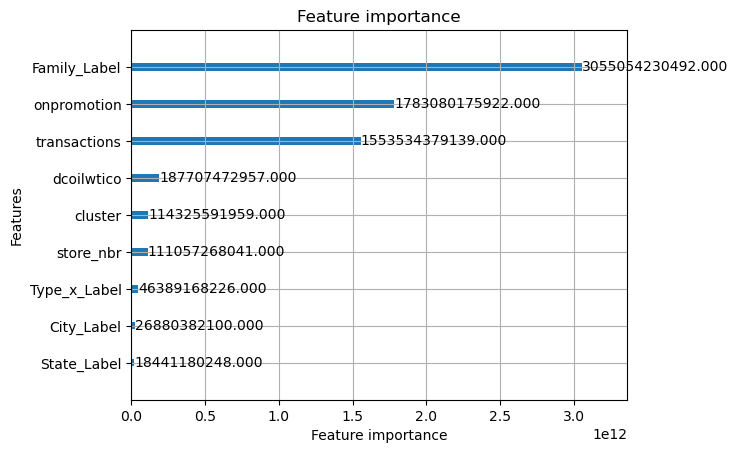

Validation RMSE: 281.87522379278784


In [156]:
lgb_model = lgb.train(params, lgb_train_data, num_boost_round=100)
test['sales'] = lgb_model.predict(X_test_main)

# Display feature importance
lgb.plot_importance(lgb_model, max_num_features=15, importance_type='gain')
plt.show()

# Evaluate the model on a subset of the training data (optional)
X_train_subset, X_val, y_train_subset, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
lgb_train_data_subset = lgb.Dataset(X_train_subset, label=y_train_subset)
lgb_val_data = lgb.Dataset(X_val, label=y_val, reference=lgb_train_data_subset)

# Train the model with validation
lgb_model = lgb.train(params, lgb_train_data_subset, num_boost_round=100, valid_sets=[lgb_train_data_subset, lgb_val_data])

# Predictions on validation data
y_val_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
print(f'Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}')

Decision Tree

In [158]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the model
regressor = DecisionTreeRegressor(random_state=0)
X_train_subset, X_test, y_train_subset, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

X_train_subset = X_train_subset.dropna()
y_train_subset = y_train_subset[X_train_subset.index]

regressor.fit(X_train_subset, y_train_subset) 

y_pred = regressor.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Root Mean Square Error (RMSE): 536.08


Random Forest

Version 1

In [161]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
regressor = RandomForestRegressor(n_estimators=100,max_depth=2, min_samples_split=10, min_samples_leaf=10, max_leaf_nodes=10, random_state=0)
X_train_subset, X_test, y_train_subset, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

X_train_subset = X_train_subset.dropna()
y_train_subset = y_train_subset[X_train_subset.index]

regressor.fit(X_train_subset, y_train_subset)

# Predict
y_pred = regressor.predict(X_test)

# Calculate RMSE
y_train_pred = regressor.predict(X_train_subset)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Root Mean Square Error (RMSE): 1215.82


Version 2 (Fine-tuning the Model)

In [163]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
regressor = RandomForestRegressor(n_estimators=50, max_depth=2, min_samples_split=10, min_samples_leaf=10, max_leaf_nodes=10, random_state=42)
X_train_subset, X_test, y_train_subset, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

X_train_subset = X_train_subset.dropna()
y_train_subset = y_train_subset[X_train_subset.index]

regressor.fit(X_train_subset, y_train_subset)

# Predict
y_pred = regressor.predict(X_test)

# Calculate RMSE
y_train_pred = regressor.predict(X_train_subset)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Root Mean Square Error (RMSE): 1215.69


Version 3 (Further Fine-tuning)

In [196]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=15, min_samples_leaf=10, max_leaf_nodes=15, random_state=42)
X_train_subset, X_test, y_train_subset, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

X_train_subset = X_train_subset.dropna()
y_train_subset = y_train_subset[X_train_subset.index]

regressor.fit(X_train_subset, y_train_subset)

# Predict
y_pred = regressor.predict(X_test)

# Calculate RMSE
y_train_pred = regressor.predict(X_train_subset)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Root Mean Square Error (RMSE): 796.37


XGBoost Model

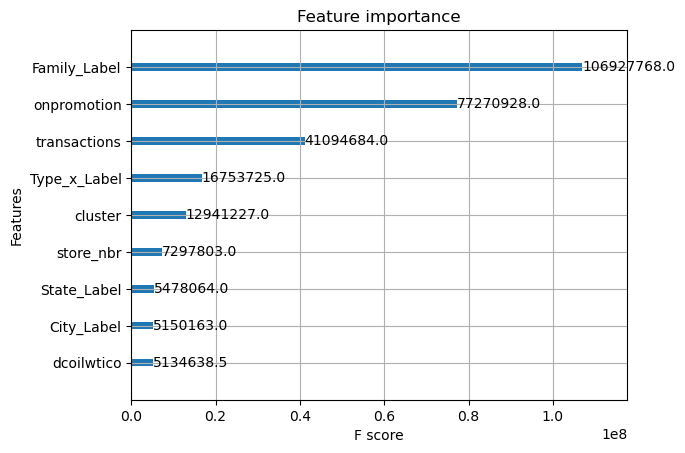

Root Mean Squared Error: 278.76507590693643


In [199]:
import xgboost as xgb

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 1,
    'n_estimators': 1000,
    'subsample': 1,
    'colsample_bytree': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'random_state': 42
}

X_train_subset, X_test, y_train_subset, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(**params)
xgb_model.fit(X_train_subset, y_train_subset)

# Display feature importance
xgb.plot_importance(xgb_model, max_num_features=15, importance_type='gain')
plt.show()

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Make predictions on the test set
test['sales'] = xgb_model.predict(X_test_main)

HistGradient Boosting Model

In [201]:
from sklearn.ensemble import HistGradientBoostingRegressor as hgbr

# Split the data
X_train_subset, X_test, y_train_subset, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create HistGradientBoostingRegressor with custom parameters
params = {
    'max_iter': 100,
    'learning_rate': 0.1,
    'max_leaf_nodes': 31,
    'min_samples_leaf': 20,
    'l2_regularization': 0.0,
    'random_state': 42
}

hist_model = hgbr(**params)

# Fit the model
hist_model.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred = hist_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Make predictions on the test set
test['sales'] = hist_model.predict(X_test_main)

Root Mean Squared Error: 340.7512498059339


CatBoost Model

In [205]:
from catboost import CatBoostRegressor

# Assuming X_train, X_test, y_train_subset, and y_test are Pandas DataFrames or Series
# Convert Pandas DataFrames/Series to NumPy arrays
# X_train = train[features]
# y_train = train['sales']
X_train_subset, X_test, y_train_subset, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_subset_np = X_train_subset.to_numpy()  # Use .to_numpy() for Pandas DataFrames
X_test_np = X_test.to_numpy()
y_train_subset_np = y_train_subset.to_numpy()
y_test_np = y_test.to_numpy()

# Ensure that y_train_subset_np has the same number of samples as X_train_np
y_train_subset_np = y_train_subset_np[:X_train_subset_np.shape[0]]  # Trim if necessary

# Check their shapes to confirm
print("Shape of X_train:", X_train_subset_np.shape)
print("Shape of y_train_subset:", y_train_subset_np.shape)

# Define CatBoost model with missing value handling
cat_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=5,
    loss_function='RMSE',
    verbose=0
)

# Fit the model and make predictions
cat_model.fit(X_train_subset_np, y_train_subset_np)  # CatBoost handles nulls automatically
y_pred_cat = cat_model.predict(X_test_np)

# Calculate RMSE
rmse_cat = np.sqrt(mean_squared_error(y_test_np, y_pred_cat))
print(f"CatBoost RMSE: {rmse_cat}")

Shape of X_train: (2443478, 9)
Shape of y_train_subset: (2443478,)
CatBoost RMSE: 428.9647942614736
